In [14]:
import json
import requests
from bs4 import BeautifulSoup
from time import sleep
from IPython.display import Image
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
import pickle

# 1. Setting scrapper
Kuchnia lidla does not have all data in one place. Single recipe doesn't contain both information about meal type ('Typ dania') and cusine style ('Kuchnie świata'). Therefore, I needed to prepare separate dicts and merge datasets after.

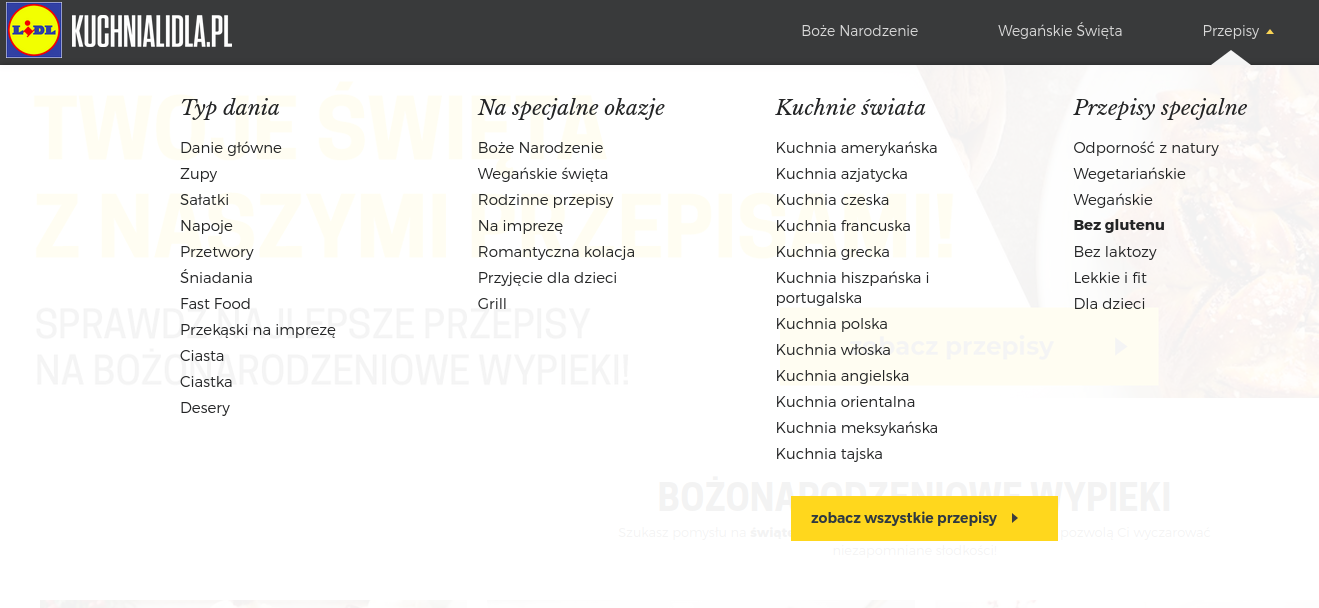

In [7]:
Image(filename = "img/kuchnialidla_page.png", width = 900, height = 300)
# ("img/kuchnialidla_page.png")

In [ ]:
all_url_by_type = {
'glowne'    :'https://kuchnialidla.pl/przepisy/dania-glowne/',
'zupy'      :'https://kuchnialidla.pl/przepisy/zupy/',
'salatki'   :'https://kuchnialidla.pl/przepisy/salatki/',
'napoje'    :'https://kuchnialidla.pl/przepisy/napoje/',
'przetwory' :'https://kuchnialidla.pl/przepisy/przetwory/',
'sniadania' :'https://kuchnialidla.pl/przepisy/sniadania/',
'fastfood'  :'https://kuchnialidla.pl/przepisy/fast-food/',
'przekaski' :'https://kuchnialidla.pl/przepisy/przekaski-na-impreze/',
'ciasta'    :'https://kuchnialidla.pl/przepisy/ciastka/',
'ciasteczka':'https://kuchnialidla.pl/przepisy/ciasteczka/',
'desery'    :'https://kuchnialidla.pl/przepisy/desery/'
}

In [ ]:
all_url_by_cusine = {'us' :'https://kuchnialidla.pl/przepisy/kuchnia-amerykanska/',
                  'azj':'https://kuchnialidla.pl/przepisy/kuchnia-azjatycka/',
                  'cze':'https://kuchnialidla.pl/przepisy/kuchnia-czeska/',
                  'fra':'https://kuchnialidla.pl/przepisy/kuchnia-francuska/',
                  'gre':'https://kuchnialidla.pl/przepisy/kuchnia-grecka/',
                  'esp':'https://kuchnialidla.pl/przepisy/kuchnia-hiszpanska-i-portugalska/',
                  'pol':'https://kuchnialidla.pl/przepisy/kuchnia-polska/',
                  'ita':'https://kuchnialidla.pl/przepisy/kuchnia-wloska/',
                  'uk' :'https://kuchnialidla.pl/przepisy/brytyjska/',
                  'orj':'https://kuchnialidla.pl/przepisy/kuchnia-orientalna/',
                  'mex':'https://kuchnialidla.pl/przepisy/kuchnia-meksykanska/',
                  'taj':'https://kuchnialidla.pl/przepisy/kuchnia-tajska/'
            }


Let's define the function that will scrap the recipes from a single page. Fortunately, there is structured data that we can use. It is "is a standardized format for providing information about a page and classifying the page content" (developers.google.com). We can easily find the json-ld format and save in the dict.

In [ ]:
def get_recipes_list(url):
    result = []
    parser = "lxml"
    
    for i in range(1,40):
        www     = f'{url}{i}#lista'
        session = requests.Session()
        retry   = Retry(connect=3, 
                        backoff_factor=0.5)
        adapter = HTTPAdapter(max_retries=retry)
        session.mount('http://', adapter)
        session.mount('https://', adapter)
        req     = session.get(www)
        
        if req.status_code == 200:
            soup  = BeautifulSoup(req.text, parser)
            links = soup.find_all('a', {'class': 'description'})
            
            for link in links:
                result.append(link.attrs['href'])
                
            print(f"Page {i} scrapped")
            
        if req.status_code != 200:
            continue
    return result


def get_json(url):
    parser = "html.parser"
    req    = requests.get(url)
    soup   = BeautifulSoup(req.text, parser)
    return json.loads("".join(soup.find("script", {"type":"application/ld+json"}).contents))



# 2. Scrapping data
First, we will scrapp recipes by type, then, by cusine.

In [ ]:
all_links_type = {}

for meal_type in all_url_by_type:
    all_links_type[meal_type] = get_recipes_list(all_url_by_type[meal_type])
    sleep(7)
    print(f'{meal_type} done')

In [ ]:
all_links_cusine = {}

for cusine in all_url_by_cusine:
    all_links_cusine[cusine] = get_recipes_list(all_url_by_cusine[cusine])
    sleep(7)
    print(f'{cusine} done')


Commented code below is for saving scrapped data in pickle.

In [ ]:
# all_links_cusine_pickle = r'all_links_cusine_pickle.pkl'

# with open(all_links_cusine_pickle, mode='wb') as file:
#     pickle.dump(all_links_cusine, file)

In [ ]:
# all_links_pickle = r'all_links_pickle.pkl'

# with open(all_links_pickle, mode='wb') as file:
#     pickle.dump(all_links, file)

Since datasets are storaged in pickles, you can simply load them

In [15]:
FILE_ALL_TYPE_LINKS = r'data/all_links_type_pickle.pkl'

with open(FILE_ALL_TYPE_LINKS, mode='rb') as file:
    all_links_type = pickle.load(file)

In [20]:
all_links_type

{'glowne': ['/soczewiaki-z-pieczarkami-i-kwasna-smietana',
  '/rolada-slaska-z-kluskami-i-modra-kapusta',
  '/faszerowany-kurczak-pieczony-w-calosci',
  '/pierogi-z-serem-i-kasza',
  '/bogracz-z-pieczona-papryka-i-fasola',
  '/pieczona-dynia-hokkaido-z-pesto-z-rukoli',
  '/kopytka-z-kasztanami-i-grzybami',
  '/ravioli-z-cukinia-i-ricotta',
  '/galettes-bretonnes-czyli-nalesniki-po-bretonsku',
  '/kluski-dyniowe-z-jogurtem-i-owocami',
  '/kurczak-w-sosie-jogurtowym',
  '/koreanski-dosirak-ryz-z-przystawkami-w-pudelku',
  '/tagliatelle-z-sosem-alfredo',
  '/domowy-cebularz-z-kurkami',
  '/kurczak-pieczony-z-warzywami-na-jednej-blasze',
  '/hreczanyki-z-weganska-okrasa',
  '/dolmades-z-miesem-mielonym-i-oliwkami',
  '/stek-wolowy-z-salatka-z-kaszy-bulgur',
  '/nalesniki-z-kremem-orzechowym-i-ciasteczkami',
  '/chorwacki-pilaw-z-jagniecina',
  '/bulgogi-wolowina-po-koreansku',
  '/zapiekanka-z-weganskim-mielonym-i-warzywami',
  '/pity-z-weganskimi-klopsami-i-domowym-majonezem-roslinnym',
 

In [17]:
FILE_ALL_CUSINE_LINKS = r'data/all_links_cusine_pickle.pkl'

with open(FILE_ALL_CUSINE_LINKS, mode='rb') as file:
    all_links_cusine = pickle.load(file)

In [21]:
all_links_cusine

{'us': ['/sernik-na-zimno-z-maslem-orzechowym-i-kajmakiem',
  '/weganskie-blondie-z-maslem-orzechowym',
  '/wegeburgery-z-orientalnym-sosem-sliwkowym',
  '/imprezowe-hot-dogi-z-weganskimi-kielbaskami-i-sosem-bbq',
  '/czekoladowe-bajgle-z-kremem-smietankowym',
  '/wegetarianskie-burgery-z-karmelizowana-cebulka',
  '/pulled-pork-na-2-sposoby-faszerowane-bataty-i-kanapki',
  '/domowy-sos-barbecue',
  '/muffiny-z-czekolada-klasyczne-i-weganskie',
  '/hash-browns-z-jajkiem-sadzonym-i-boczkiem',
  '/ciasto-a-la-mars',
  '/weganskie-hot-dogi-w-domowych-bulkach',
  '/domowe-pastrami',
  '/donuty-dyniowe',
  '/kanapka-z-pastrami',
  '/amerykanskie-gofry',
  '/wolno-grillowane-zeberka-bbq',
  '/tosty-z-kremem-piankowym-i-orzechowym',
  '/ciasteczka-z-biala-czekolada',
  '/drozdzowe-buleczki-do-burgerow',
  '/ciasto-z-batatow',
  '/dyniowe-pancakes-z-karmelizowanymi-bananami',
  '/ciasto-bostonskie',
  '/dzem-z-boczku',
  '/domowy-keczup',
  '/ciasto-o-smaku-coli',
  '/corn-dog',
  '/cheeseburge

Now since we have all the links of recipes, we can finally scrap each recipe.

In [ ]:
recipe_list = []
counter     = 0
for list_of_links in all_links_type.values():
    
    for link in list_of_links:
        counter +=1
        print(counter)
        session = requests.Session()
        retry   = Retry(connect=3, 
                        backoff_factor=1)
        adapter = HTTPAdapter(max_retries=retry)
        session.mount('http://', adapter)
        session.mount('https://', adapter)
        url='https://kuchnialidla.pl'+link
        print(url)
        
        try:
            req = session.get(url)
            recipe_list.append([counter,link,get_json(url)])
        except requests.exceptions.ConnectionError:
            req.status_code = "Connection refused"
            print(req.status_code)
        except ValueError:
            req.status_code = "JSON error"
            print(req.status_code)



Finally, we can save the scrapped recipes

In [18]:
# with open(FILE_ALL_SCRAPPED_PAGES, mode='rb') as file:
#     data=pickle.load(file)

FILE_ALL_SCRAPPED_PAGES = r'data/pickle_recipe_list.pkl'

with open(FILE_ALL_SCRAPPED_PAGES, mode='rb') as file:
    data = pickle.load(file)

In [19]:
data

[[1,
  '/ravioli-z-cukinia-i-ricotta',
  {'@context': 'http://schema.org/',
   '@type': 'Recipe',
   'name': 'Ravioli z cukinią i ricottą',
   'image': 'https://kuchnialidla.pl/img/PL/960x540/5ba5c2026e34-e993e52febf4-KW43_KAROL_Ravioli_34687_070920_MS_102441_1250x700.jpg',
   'author': {'@type': 'Person', 'name': 'Karol Okrasa'},
   'recipeCategory': 'Bez mięsa',
   'datePublished': '2020-10-19',
   'description': 'Ravioli z cukinią i ricottą - poznaj najlepszy przepis. ⭐ Sprawdź składniki i instrukcje na KuchniaLidla.pl!',
   'prepTime': 'PT2H0M',
   'recipeYield': 'Liczba porcji - 6',
   'recipeCuisine': 'Kuchnia włoska',
   'recipeIngredient': ['cukinia – 1 szt.',
    'oliwa z oliwek – 1 łyżka',
    'czosnek – 1 ząbek',
    'świeża bazylia – 4 listki',
    'ser ricotta – 200 g',
    'żółtka – 2 szt.',
    'grana padano lub parmezan – 60 g',
    'sól – 2 szczypty',
    'pieprz – 2 szczypty',
    'mąka tortowa lub semolina – 300 g',
    'jajko – 1 szt.',
    'żółtko – 4 szt.',
    'o

Now, go to the next notebook (2. Dataset cleaning), where we will clear the data